# Shortest Path Problems


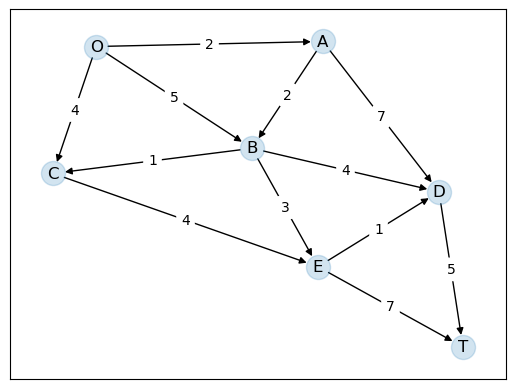

In [66]:
# Create a graph with 10 nodes 

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

node_names = ['O', 'A', 'B', 'C', 'D', 'E', 'T']

for i, name in enumerate(node_names):
    G.add_node(name, pos=(i, i))

G.add_edge('O', 'A', weight=2)
G.add_edge('O', 'B', weight=5)
G.add_edge('O', 'C', weight=4)

G.add_edge('A', 'B', weight=2)
G.add_edge('A', 'D', weight=7)

G.add_edge('B', 'D', weight=4)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=3)

G.add_edge('C', 'E', weight=4)

G.add_edge('D', 'T', weight=5)

G.add_edge('E', 'D', weight=1)
G.add_edge('E', 'T', weight=7)

# Draw the graph as a directed graph with the node labels and edge weights
# in a spring layout

pos = nx.spring_layout(G, seed=32)

nx.draw_networkx_nodes(G, pos, alpha=0.2)
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_labels(G, pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, rotate=False)

plt.show()



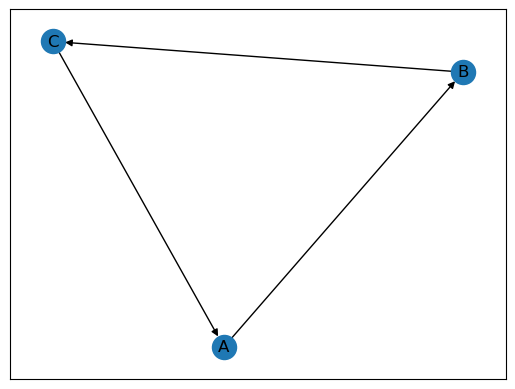

In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Create a directed graph
# G = nx.DiGraph()

# # Add nodes and edges
# G.add_edge('A', 'B')
# G.add_edge('B', 'C')
# G.add_edge('C', 'A')

# # Draw the graph
# pos = nx.spring_layout(G)  # positions for all nodes
# nx.draw_networkx_nodes(G, pos)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edges(G, pos, arrows=True)

# # Display the graph
# plt.show()

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model

m = gp.Model("shortest_path")

# Create variables

x = m.addVars(G.edges(), vtype=GRB.BINARY, name='x')

# Set objective

m.setObjective(x.prod(nx.get_edge_attributes(G, 'weight')), GRB.MINIMIZE)

# The source node has flow 1

m.addConstr(x.sum('O', '*') == 1, name='Start from the source')

# The sink node has flow -1

m.addConstr(x.sum('*', 'T') == 1, name='Reach the sink')

# Each node has zero net flow

m.addConstrs((
    x.sum('*', node) - x.sum(node, '*') == 0 
    for node in node_names 
    if node not in ['O', 'T']
    ),
    name='Zero net flow'
)

# Add constraints

m.optimize()

# Print solution


m.write('shortest_path.lp')

for v in m.getVars():
    if v.x > 1e-6:
        print('%s %g' % (v.varName, v.x))


Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 24.04.2 LTS")

CPU model: Intel(R) Core(TM) i9-14900K, instruction set [SSE2|AVX|AVX2]
Thread count: 32 physical cores, 32 logical processors, using up to 32 threads

Optimize a model with 7 rows, 12 columns and 24 nonzeros
Model fingerprint: 0x499c87cb
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 15.0000000
Presolve removed 7 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 32 available processors)

Solution count 2: 13 15 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.300000000000e+01, best bound 1.300000000000e+01, gap 0.0000%
x[O,A] 1
x[A,B] 1
x[B,D] 1
x[D,T] 1
